### Load Saved Section if exists

### Load libraries, functions, palette, theme

In [1]:
import os

In [2]:
# read file from another directory
path = \
    ('/Users/achasovsky/Library/CloudStorage/GoogleDrive-alexanderchasovsky@gmail.com/'
     'Мой диск/Data Science Projects/economy-rus/')

os.chdir(path + 'notebooks/')

# run stopwatch
from tools import Stopwatch
stopwatch = Stopwatch()
start = stopwatch.start()

# import libraries, etc.
%run load.ipynb

# and go back to current directory ('current_path' variable is assigned in _load.ipynb)
os.chdir(current_path)

In [3]:
save_plot_dir = path + 'docs/img'

In [4]:
economics_data = loadit(
    'economics_data',
    dir= path + 'data/00-Datasets/'
)

In [5]:
len(economics_data)

95

## <font color='#2A5899'> Доходы и расходы домохозяйств в 2000-е

### Динамика доходов домохозяйств в городской и сельской местности

In [6]:
income = economics_data['7.1'].copy()

In [35]:
income_plot_data = income[income['Тип'] == 'Всего'].T[1:].iloc[:, -2:].copy()

In [36]:
income_plot_data['delta'] = \
    income_plot_data.iloc[:, 0] - income_plot_data.iloc[:, 1]

In [9]:
income_plot_data['delta_town'] = \
    (income_plot_data['Домашние хозяйства, проживающиев городской местности']
     .pct_change()
     .mul(100))

income_plot_data['delta_country'] = \
    (income_plot_data['Домашние хозяйства, проживающиев сельской местности']
     .pct_change()
     .mul(100))

/var/folders/5k/mm8kcqrs6vvd8967t1r9ng380000gn/T/ipykernel_39514/3073320293.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .pct_change()
/var/folders/5k/mm8kcqrs6vvd8967t1r9ng380000gn/T/ipykernel_39514/3073320293.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .pct_change()


In [10]:
income_plot_data['delta_pct'] = \
    income_plot_data['delta_town'] - income_plot_data['delta_country']

In [11]:
income_plot_data['country/town'] = \
    (income_plot_data['Домашние хозяйства, проживающиев сельской местности']
     / income_plot_data['Домашние хозяйства, проживающиев городской местности'])

In [12]:
income_plot_data.index = income_plot_data.index.astype(int)

In [13]:
income_plot_data

,"Домашние хозяйства, проживающиев городской местности","Домашние хозяйства, проживающиев сельской местности",delta,delta_town,delta_country,delta_pct,country/town
2003,4009.0,2423.2,1585.8,NaN,NaN,NaN,0.60444
2004,5016.0,2851.3,2164.7,25.118483,17.666722,7.451762,0.568441
2005,6529.5,3604.7,2924.8,30.173445,26.423035,3.750410,0.552064
2006,7984.9,4495.4,3489.5,22.289609,24.709407,-2.419798,0.562988
2007,10354.6,5871.1,4483.5,29.677266,30.602394,-0.925128,0.567004
2008,13465.9,7786.5,5679.4,30.047515,32.624210,-2.576695,0.578238
2009,13869.4,8416.9,5452.5,2.996458,8.096064,-5.099606,0.606868
2010,16265.0,10128.7,6136.3,17.272557,20.337654,-3.065097,0.62273
2011,18291.1,11745.8,6545.3,12.456809,15.965524,-3.508715,0.642159
2012,20405.0,13320.3,7084.7,11.556987,13.404791,-1.847805,0.652796


In [14]:
# protest
plot_text1 =  '''
    Протестные акции
    (декабрь 2011)
'''
# elections
plot_text2 = '''
    Выборы президента РФ
    (март 2012)
'''
plot_titles = [
    'Абсолютная разница в доходах городской и сельской местностей',
    'Отношение доходов в сельской местности к доходам в городской местности',
    'Разница в темпах роста городских и сельских доходов',
    'Разница в темпах роста городских и сельских доходов (тренд)'
]

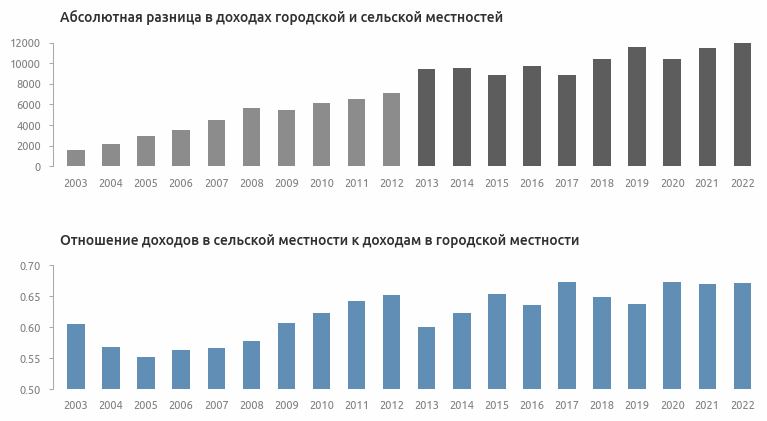

Images 'income-(cities)-1.png' and 'income-(cities)-1.svg' successfully saved into '/Users/achasovsky/Library/CloudStorage/GoogleDrive-alexanderchasovsky@gmail.com/Мой диск/Data Science Projects/economy-rus/docs/img' directory


In [15]:
fig, ax = plt.subplots(2, 1, figsize=(9, 4.5))

ax[0].bar(
    height=income_plot_data['delta'][:10],
    x=income_plot_data.index[:10], width=0.5, color=palette[-4])
ax[0].bar(
    height=income_plot_data['delta'][10:],
    x=income_plot_data.index[10:], width=0.5, color=palette[0])
ax[0].set_xticks(ticks=income_plot_data.index)
ax[0].set_title(plot_titles[0])
ax[0].set_ylim(top=12000)
axis_rstyle(margin=True, ax=ax[0])
ax[0].tick_params(axis='x', bottom=False)
# adjust the length of spines
axis_adjust_barplot(line_hidden=True, ax=ax[0])

ax[1].bar(
    height=income_plot_data['country/town'],
    x=income_plot_data.index, width=0.5, color=palette[2])
ax[1].set_xticks(ticks=income_plot_data.index)
ax[1].set_title(plot_titles[1])
ax[1].set_ylim(0.5, 0.7)
axis_rstyle(margin=True, ax=ax[1])
ax[1].tick_params(axis='x', bottom=False)
# adjust the length of spines
axis_adjust_barplot(line_hidden=True, ax=ax[1])

plt.subplots_adjust(hspace=0.8)
plt.show()

savefig('income-(cities)-1', dir=save_plot_dir, dpi=100)

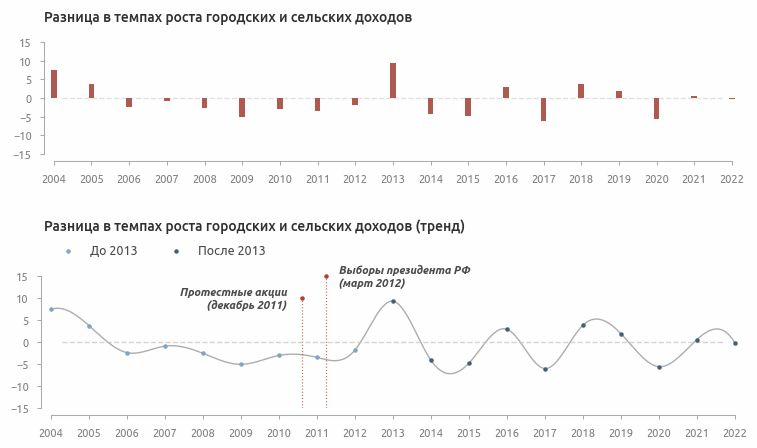

Images 'income-(cities)-2.png' and 'income-(cities)-2.svg' successfully saved into '/Users/achasovsky/Library/CloudStorage/GoogleDrive-alexanderchasovsky@gmail.com/Мой диск/Data Science Projects/economy-rus/docs/img' directory


In [16]:
fig = plt.figure(figsize=(9, 4.75))
spec = fig.add_gridspec(2, 1, height_ratios=[1, 1.25])

# ax0
ax = fig.add_subplot(spec[0, :])
ax.bar(
    height=income_plot_data['delta_pct'],
    x=income_plot_data.index, width=0.15,
    ec='none', color=palette[1], zorder=10
)
ax.axhline(
    0, 0.025, 0.975, lw=1, ls='--', color=palette[-2], alpha=0.5, zorder=1
)
ax.set_xticks(ticks=income_plot_data.index)
ax.set_title(plot_titles[2])
ax.grid(False)
# axis_rstyle(xticks=[2004, 2022, 1], yticks=[-15, 15], margin=True)
axis_rstyle(
    offset_left=0, offset_bottom=5,
    yticks=[-15, 15], xticks=[2004, 2022])

# ax1
ax = fig.add_subplot(spec[1, :])
ax.scatter(
    income_plot_data.index[:10], income_plot_data['delta_pct'][:10],
    s=5, color=palette[13], zorder=10
)
ax.scatter(
    income_plot_data.index[10:], income_plot_data['delta_pct'][10:],
    s=5, color=palette[10], zorder=10
)
ax.legend(
    labels=['До 2013', 'После 2013'], **legend_inline, ncols=2
)
ax.plot(
    smoothed(income_plot_data['delta_pct'][1:], return_type='df'),
    lw=1, alpha=0.5, zorder=1
)
ax.axhline(0, 0.025, 0.975, lw=1, ls='--', color=palette[-2], alpha=0.75)
ax.set_ylim(top=17)
ax.set_xticks(ticks=income_plot_data.index)
ax.set_title(plot_titles[3], **title_inline)
ax.grid(False)

plot_timemarker(
    text=plot_text1, x=2010.6, y_text=10, y_line=0.8, delta=0.4,
    weight='bold', style='italic', ha='right', ax=ax)
plot_timemarker(
    text=plot_text2, x=2011.25, y_text=15, y_line=0.93, delta=0.05,
    weight='bold', style='italic', ax=ax)
axis_rstyle(
    offset_left=2, offset_bottom=5,
    yticks=[-15, 15], xticks=[2004, 2022])

plt.subplots_adjust(hspace=0.9)
plt.show()

savefig('income-(cities)-2', dir=save_plot_dir, dpi=100)

### Структура расходов домохозяйств в городской местности

In [17]:
spends = economics_data['7.2']

In [18]:
spends.head()

,Тип,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Все домашние хозяйства,Всего,2989.3,3582.9,4490.0,5353.1,6842.6,8561.8,9054.0,10513.4,11715.1,...,14153.8,15094.3,15295.4,16632.5,17319.9,18031.4,19727.7,19180.8,21154.3,23787.9
Все домашние хозяйства,Расходы на питание,1337.7,1537.6,1765.0,1984.1,2321.1,2947.1,3276.1,3714.6,4078.1,...,4694.9,5111.0,5707.8,6220.7,6250.0,6352.4,6818.3,7101.9,7675.2,8852.7
Все домашние хозяйства,Расходы на непродовольственные товары,1029.2,1245.9,1639.0,1976.7,2735.0,3368.2,3287.3,3906.5,4444.2,...,5600.3,5860.0,5365.5,5696.8,6230.6,6484.0,7054.8,6901.0,7418.0,8232.7
Все домашние хозяйства,Расходы на алкогольные напитки,60.5,70.1,81.7,98.2,114.3,133.8,146.3,172.1,193.6,...,233.2,257.8,263.4,284.4,279.6,284.8,313.0,337.7,320.7,379.0
Все домашние хозяйства,Расходы на оплату услуг,545.1,711.6,994.6,1283.2,1660.5,2098.1,2329.2,2705.1,2984.5,...,3606.2,3849.0,3885.3,4388.7,4520.5,4871.6,5490.6,4785.4,5686.4,6265.3


##### Preparing data

In [19]:
spends_plot_town = \
    spends.loc['Домашние хозяйства, проживающиев городской местности'].T.copy()

In [20]:
spends_plot_town.columns = spends_plot_town.iloc[0, :]

In [21]:
spends_plot_town = spends_plot_town.drop(spends_plot_town.iloc[0].name, axis=0)

In [22]:
spends_plot_town.head()

Тип,Всего,Расходы на питание,Расходы на непродовольственные товары,Расходы на алкогольные напитки,Расходы на оплату услуг,"Стоимость услуг, оказанных работодателем бесплатно или по льготным ценам"
2003,3331.5,1406.5,1178.7,67.0,659.1,20.2
2004,4022.0,1631.0,1430.8,79.1,859.8,21.3
2005,5061.7,1866.0,1885.0,91.7,1206.5,12.5
2006,6021.6,2095.3,2248.3,110.8,1553.1,14.1
2007,7728.3,2447.3,3122.5,127.4,2016.6,14.5


In [23]:
# specific spends as fraction of total spends
spends_plot_town['food_frac'] = \
    ((spends_plot_town['Расходы на питание']
      / spends_plot_town['Всего']).mul(100))

spends_plot_town['goods_frac'] = \
    ((spends_plot_town['Расходы на непродовольственные товары']
      / spends_plot_town['Всего']).mul(100))

spends_plot_town['services_frac'] = \
    ((spends_plot_town['Расходы на оплату услуг']
      / spends_plot_town['Всего']).mul(100))

spends_plot_town['alchohol_frac'] = \
    ((spends_plot_town['Расходы на алкогольные напитки']
      / spends_plot_town['Всего']).mul(100))

In [24]:
# goods and services as fraction of food
spends_plot_town['goods_food'] = \
    ((spends_plot_town['Расходы на непродовольственные товары']
      / spends_plot_town['Расходы на питание']).mul(100))

spends_plot_town['services_food'] = \
    ((spends_plot_town['Расходы на оплату услуг']
      / spends_plot_town['Расходы на питание']).mul(100))

In [25]:
spends_plot_town = spends_plot_town.astype(float)

In [26]:
# growths of fractions
spends_plot_town['food_growth'] = spends_plot_town['food_frac'].pct_change()
spends_plot_town['goods_growth'] = spends_plot_town['goods_frac'].pct_change()
spends_plot_town['services_growth'] = spends_plot_town['services_frac'].pct_change()
spends_plot_town['alchohol_growth'] = spends_plot_town['alchohol_frac'].pct_change()

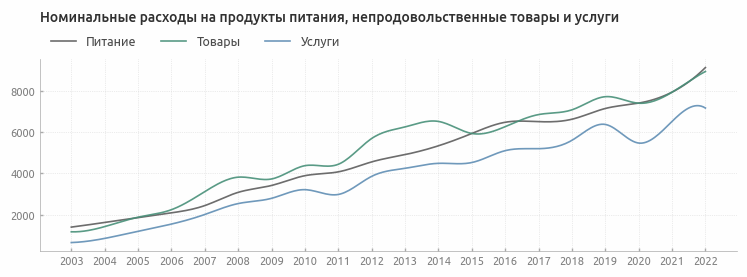

In [27]:
plt.plot(
    smoothed(spends_plot_town['Расходы на питание']), label='Питание',
    color=palette[0], alpha=0.9
)
plt.plot(
    smoothed(spends_plot_town['Расходы на непродовольственные товары']), label='Товары',
    color=palette[3], alpha=0.9
)
plt.plot(
    smoothed(spends_plot_town['Расходы на оплату услуг']), label='Услуги',
    color=palette[2], alpha=0.9
)
plt.xticks(ticks=spends_plot_town.index.tolist())
plt.title(
    'Номинальные расходы на продукты питания, непродовольственные товары и услуги',
    **title_inline
)
plt.legend(**legend_inline, ncols=3)
plt.show()

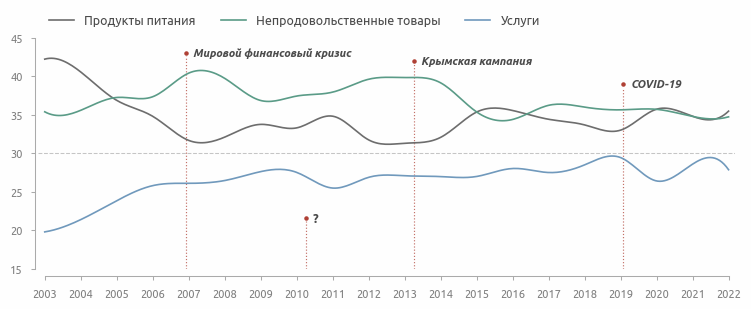

Images 'spend-structure-(cities).png' and 'spend-structure-(cities).svg' successfully saved into '/Users/achasovsky/Library/CloudStorage/GoogleDrive-alexanderchasovsky@gmail.com/Мой диск/Data Science Projects/economy-rus/docs/img' directory


In [28]:
fig, ax = plt.subplots(figsize=(9, 3))

plt.plot(
    *smoothed(
        spends_plot_town.index,
        spends_plot_town['food_frac'],
        return_type='array'),
    color=alpha_color(palette[0], 0.9))
plt.plot(
    *smoothed(
        spends_plot_town.index,
        spends_plot_town['goods_frac'],
        return_type='array'),
    color=alpha_color(palette[3], 0.9))
plt.plot(
    *smoothed(
        spends_plot_town.index,
        spends_plot_town['services_frac'],
        return_type='array'),
    color=alpha_color(palette[2], 0.9))

# plt.title(
#     'Изменение структуры расходов домохозяйств в городской местности (%)',
#     **title_inline)
plt.legend(
    labels=['Продукты питания', 'Непродовольственные товары', 'Услуги'],
    ncols=3, **legend_inline)

plt.axhline(30, lw=0.75, ls='--', color=palette[-2])

# COVID - January 2019
plot_timemarker(
    text='COVID-19', x=2019.08,
    y_text=39, y_line=0.78,  size=8, delta=0.2,
    weight='bold', style='italic')

# Crisis 2008 - August 2007
plot_timemarker(
    text='Мировой финансовый кризис', x=2006.92,
    y_text=43, y_line=0.92,  size=8, delta=0.2,
    weight='bold', style='italic')

# ?
plot_timemarker(
    text='?', x=2010.25,
    y_text=21.55, y_line=0.205,  size=9, delta=0.2,
    weight='bold', style='normal')

# Crimea - March 2014
plot_timemarker(
    text='Крымская кампания', x=2013.25,
    y_text=42, y_line=0.89,  size=8, delta=0.2,
    weight='bold', style='italic')

plt.ylim(top=45)
plt.xticks(
    ticks=spends_plot_town.index.tolist(),
    labels=spends_plot_town.index.tolist()
)
axis_rstyle(offset_bottom=5, offset_left=2)

plt.show()

savefig('spend-structure-(cities)', dir=save_plot_dir, dpi=100)

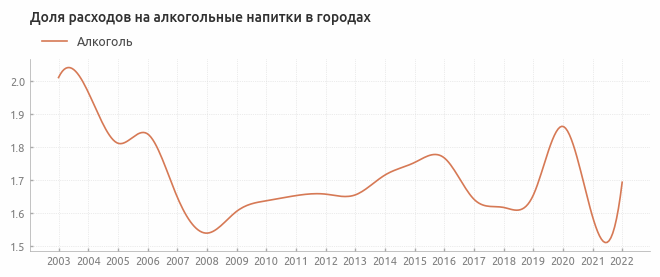

In [29]:
fig = plt.figure(figsize=(8,2.5))
plt.plot(
    *smoothed(
        spends_plot_town.index,
        spends_plot_town['alchohol_frac'],
        return_type='array'),
    color=palette[9], zorder=1)
plt.title('Доля расходов на алкогольные напитки в городах', **title_inline)
plt.legend(labels=['Алкоголь'], **legend_inline)
plt.xticks(
    ticks=spends_plot_town.index.tolist(),
    labels=spends_plot_town.index.tolist())
plt.show()

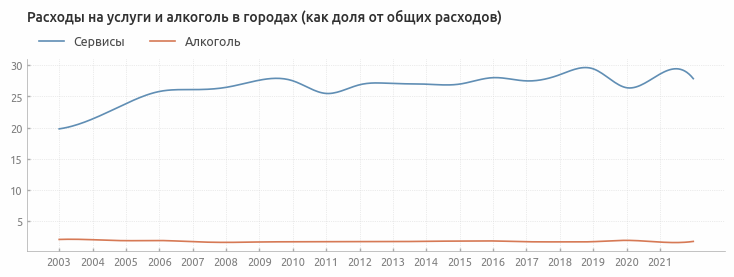

In [30]:
plt.plot(
    smoothed(spends_plot_town['services_frac']),
    color=palette[2], label='Сервисы');
plt.plot(
    smoothed(spends_plot_town['alchohol_frac']),
    color=palette[9], label='Алкоголь')
plt.xticks(
    ticks=np.arange(spends_plot_town.index[0], spends_plot_town.index[-1]))
plt.legend(**legend_inline, ncols=2)
plt.title(
    'Расходы на услуги и алкоголь в городах (как доля от общих расходов)',
    **title_inline)
plt.show()

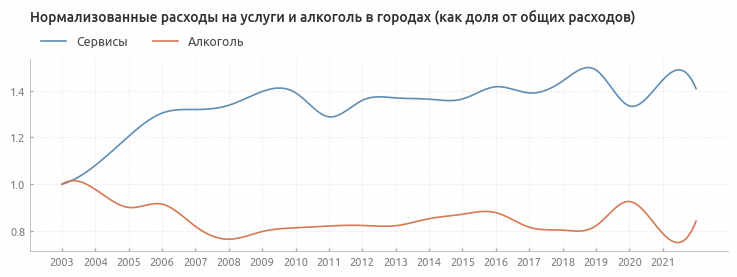

In [31]:
plt.plot(
    smoothed(normalized_by_first(spends_plot_town['services_frac'])),
    color=palette[2], label='Сервисы');
plt.plot(
    smoothed(normalized_by_first(spends_plot_town['alchohol_frac'])),
    color=palette[9], label='Алкоголь')
plt.xticks(
    ticks=np.arange(spends_plot_town.index[0], spends_plot_town.index[-1]))
plt.legend(**legend_inline, ncols=2)
plt.title('Нормализованные расходы на услуги и алкоголь в городах (как доля от общих расходов)', **title_inline)
plt.show()

### Execution time

In [32]:
print(f'Execution time: {stopwatch.stop(start)}')

Execution time: 0:00:15
